In [8]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import curvedsky as cs
import camb
import pickle as pl
import healpy as hp

In [6]:
lmin_ivf = 2
lmax_ivf = 4096
lmax_qlm = 4096
Tcmb = 2.726e6

In [5]:

# set up CAMB
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=6000)
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK',raw_cl=True)
lcl = powers['lensed_scalar'].T[:,:lmax_ivf+1]/Tcmb**2

def N0s(nlev_p,lmin_ivf,beam=1):
    bl = hp.gauss_beam(np.radians(beam/60),lmax=lmax_ivf)
    ncl = np.ones(lmax_qlm+1)*np.radians(nlev_p/60)**2/bl**2/Tcmb**2
    ocl = lcl.copy()
    ocl[1,:] = ocl[1,:]+ncl
    ocl[2,:] = ocl[2,:]+ncl
    ucl = powers['lens_potential'].T[:,:lmax_ivf+1]
    N0i = cs.norm_quad.qeb_iter(lmax_qlm, lmax_ivf, lmin_ivf, lmax_ivf, lmin_ivf, lmax_ivf,lcl[1, :], ocl[1, :], ocl[2, :], ucl[0, :], iter=50)[0]
    N0 = cs.norm_quad.qeb('lens', lmax_qlm, lmin_ivf, lmax_ivf, lcl[1, :], ocl[1, :], ocl[2, :])[0]
    return N0, N0i

In [7]:
data = {}
for nlev_p in [6,2,1]:
    data[nlev_p] = N0s(nlev_p,lmin_ivf)

           2  2.113199477991943E-005
           3  8.015215700725399E-007
           2  1.514487279600970E-004
           3  1.840280987765332E-005
           4  2.632162404504529E-006
           2  3.277439028353574E-004
           3  5.645907493866451E-005
           4  1.205353337811022E-005
           5  2.697671892608355E-006


In [9]:
pl.dump(data,open('n0_iter.pkl','wb'))

In [27]:
def efficiency(nlev_p,lmin_ivf,beam=1):
    N0,N0i = N0s(nlev_p,lmin_ivf,beam)
    return (1 - np.mean(N0i[10:100]/N0[10:100]))*100

In [ ]:
# lmin_ivf_arr = [200,300]
# data = {}
# for ivf_lmin in lmin_ivf_arr:
#     for beam in [2,1]:
#         for nlev_p in [10,8,6,4,2,1]:
#             data[(ivf_lmin,beam,nlev_p)] = efficiency(nlev_p,ivf_lmin,beam)

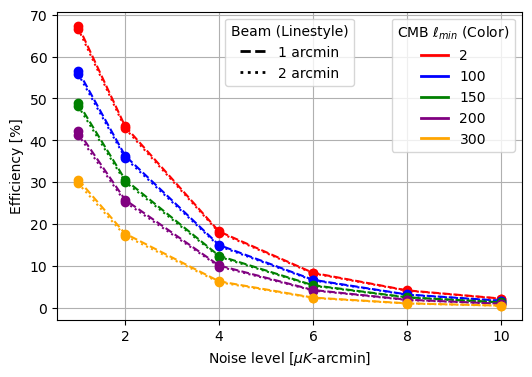

In [5]:

data = {
    (2, 2, 10): 2.153039045329108,
    (2, 2, 8): 4.077219349262151,
    (2, 2, 6): 8.206496700634592,
    (2, 2, 4): 17.97718380562484,
    (2, 2, 2): 42.83924605244083,
    (2, 2, 1): 66.65078827441496,
    (2, 1, 10): 2.2039349670405883,
    (2, 1, 8): 4.161730284407639,
    (2, 1, 6): 8.349572593668286,
    (2, 1, 4): 18.233724809478346,
    (2, 1, 2): 43.34687935161351,
    (2, 1, 1): 67.38215678150267,
    (100, 2, 10): 1.6344786302550762,
    (100, 2, 8): 3.1041233147680813,
    (100, 2, 6): 6.544703838710275,
    (100, 2, 4): 14.728684870385965,
    (100, 2, 2): 35.80252444752624,
    (100, 2, 1): 55.855909587977294,
    (100, 1, 10): 1.6796812059189814,
    (100, 1, 8): 3.1805632973846976,
    (100, 1, 6): 6.683322977372241,
    (100, 1, 4): 14.986641276857092,
    (100, 1, 2): 36.318036267947406,
    (100, 1, 1): 56.6080225509639,
    (150, 2, 10): 1.25418849667428,
    (150, 2, 8): 2.436850265513879,
    (150, 2, 6): 5.254587548882894,
    (150, 2, 4): 12.160650884855828,
    (150, 2, 2): 30.07284075269775,
    (150, 2, 1): 48.17589983212248,
    (150, 1, 10): 1.2943655983498448,
    (150, 1, 8): 2.5073426414088384,
    (150, 1, 6): 5.38752338595212,
    (150, 1, 4): 12.41756474321365,
    (150, 1, 2): 30.603796973297825,
    (150, 1, 1): 48.964209021782146,
    (200, 2, 10): 0.936694973810448,
    (200, 2, 8): 1.8647922329600775,
    (200, 2, 6): 4.120585187288839,
    (200, 2, 4): 9.850970282896343,
    (200, 2, 2): 25.255654553999374,
    (200, 2, 1): 41.34167007739676,
    (200, 1, 10): 0.9717727288565903,
    (200, 1, 8): 1.9285343349128237,
    (200, 1, 6): 4.245379959767758,
    (200, 1, 4): 10.102154736486114,
    (200, 1, 2): 25.79186937947595,
    (200, 1, 1): 42.168183012967376,
    (300, 2, 10): 0.489412385425525,
    (300, 2, 8): 1.0189517138454063,
    (300, 2, 6): 2.334235330535739,
    (300, 2, 4): 6.099805674377556,
    (300, 2, 2): 17.19386434654312,
    (300, 2, 1): 29.74253722729432,
    (300, 1, 10): 0.5135605360286122,
    (300, 1, 8): 1.0657806406256465,
    (300, 1, 6): 2.4308990424629306,
    (300, 1, 4): 6.319428823977436,
    (300, 1, 2): 17.716257242349997,
    (300, 1, 1): 30.615506465425057
}

# Define colors and linestyles
color_map = {2: 'red', 100: 'blue', 150: 'green', 200: 'purple', 300: 'orange'}
linestyle_map = {1: ('dashed', '1 arcmin'), 2: ('dotted', '2 arcmin')}

# Group data by (lmin_ivf, beam) and sort by noise for proper line plotting
grouped_data = {}
for (lmin_ivf, beam, noise), efficiency in data.items():
    grouped_data.setdefault((lmin_ivf, beam), []).append((noise, efficiency))

# Sort noise values for proper line connections
for key in grouped_data:
    grouped_data[key].sort()

# Create a single plot for all data points
fig, ax = plt.subplots(figsize=(6, 4))

# Plot updated data with connected lines
for (lmin_ivf, beam), values in grouped_data.items():
    noises, efficiencies = zip(*values)  # Unpack sorted values
    ax.plot(noises, efficiencies, marker='o', linestyle=linestyle_map[beam][0],
            color=color_map[lmin_ivf], label=f'lmin_ivf={lmin_ivf}')

# Customize plot
ax.set_xlabel('Noise level [$\mu K$-arcmin]')
ax.set_ylabel('Efficiency [%]')
ax.grid(True)

# Create separate legends for lmin_ivf (color) and beam (linestyle)
color_legend_handles = [plt.Line2D([0], [0], color=color, lw=2, label=f'{lmin_ivf}')
                        for lmin_ivf, color in color_map.items()]

linestyle_legend_handles = [plt.Line2D([0], [0], color='black', linestyle=style, lw=2, label=label)
                            for _, (style, label) in linestyle_map.items()]

# Place legends separately
legend1 = ax.legend(handles=color_legend_handles, loc='upper right', title='CMB $\ell_{min}$ (Color)')
legend2 = ax.legend(handles=linestyle_legend_handles, loc='upper center', title='Beam (Linestyle)')

# Add first legend back to the plot
ax.add_artist(legend1)

plt.show()